<a href="https://colab.research.google.com/github/tzprograms/Implementation-of-Neural-Network-From-Scratch/blob/main/neuralNetworkFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A neuron takes inputs, does some math with them, and produces one output.

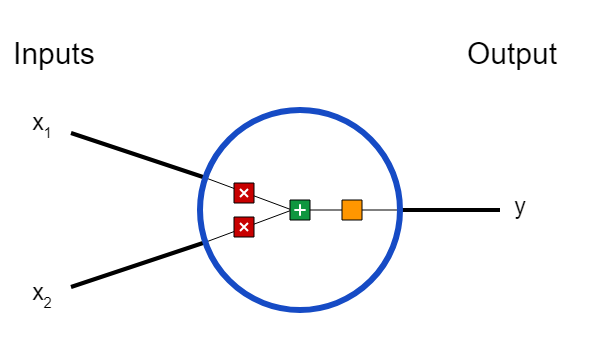

In [1]:
# #Implementation of a Neuron
# import numpy

# def sigmoid(n):
#   return 1/(1+numpy.exp(-n)) # sigmoid function

# class Neuron:
#   def __init__(self, weights , bias): # constructor to define the neuron properties
#     # Weights
#     self.w1 = numpy.random.normal()
#     self.w2 = numpy.random.normal()
#     self.w3 = numpy.random.normal()
#     self.w4 = numpy.random.normal()
#     self.w5 = numpy.random.normal()
#     self.w6 = numpy.random.normal()
#     #Biases
#     self.b1 = numpy.random.normal()
#     self.b2 = numpy.random.normal()
#     self.b3 = numpy.random.normal()
#   def feedforward(self , inputs):
#     # inputs * weights + bias
#     total = numpy.dot(self.weights , inputs) + self.bias
#     return sigmoid(total)

# neuron = Neuron([0,1] , 4)
# neuron.feedforward([2,3]) # inputs for the feed forward function

0.9990889488055994

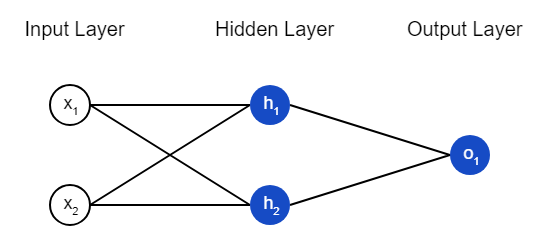

A neural network is basically a combination of different neurons , now we are building a basic network , where there are 2 hidden neurons in the hidden layer and one output neuron , the input will be given to the hidden layer and the outputs generated by those will be given to the output layer as the inputs


In [2]:
# #Defining a neural network
# class NerualNetwork:
#   def __init__(self):
#     weights = [0,1]
#     bias = 0
#     self.h1 = Neuron(weights, bias) # we are creating three instances of the neuron class , h1 , h2 (hidden layer) and o1(output layer)
#     self.h2 = Neuron(weights, bias)
#     self.o1 = Neuron(weights, bias)

#   def feedforward(self, x):
#     output_h1 = self.h1.feedforward(x)
#     output_h2 = self.h2.feedforward(x)
#     output_o1 = self.o1.feedforward([output_h1, output_h2])
#     return output_o1

# network = NerualNetwork()
# x = numpy.array([2,3])
# print(network.feedforward(x))

0.7216325609518421


Lets Train the neural network on a bunch of height and weight data to predict the gender
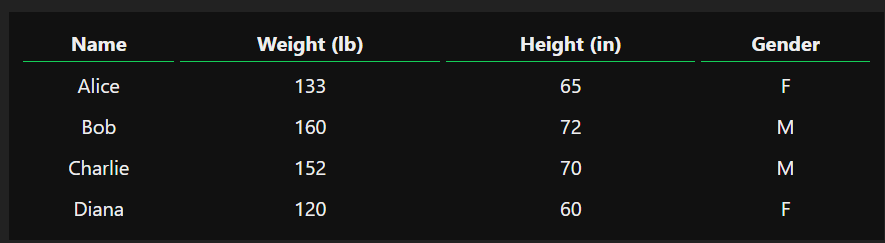

We will shift the data a bit , by subtracting the mean from both the height and the weight , height_mean = 66.75 == 67 , weight_mean = 141.25 == 141 (rounding off) , we will also represent male by 1 , and female by 0

![image.png](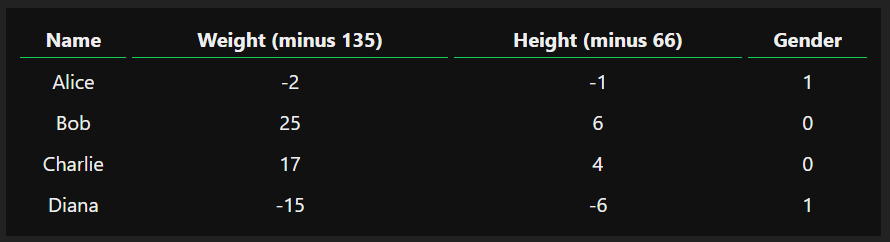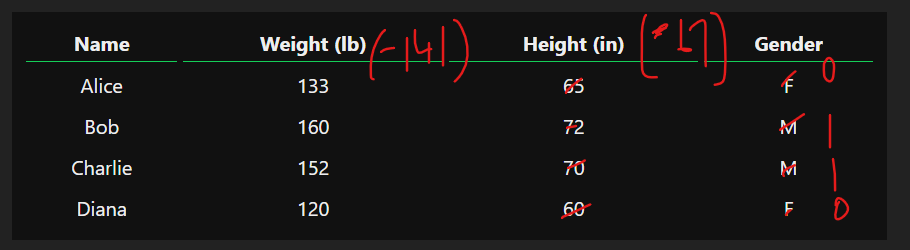)

Defining the Loss function , We will be using MeanSquaredLoss , the ultimate goal of training the neural network is to minimize this loss function for the most accurate output


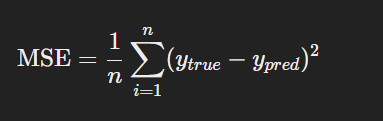

In [6]:
# def meanSquaredLoss(y_true , y_pred):
#   return ((y_true - y_pred)**2).mean()

# y_true = numpy.array([1 , 1 , 1 , 1 ])
# y_pred = numpy.array([1 , 1 , 1 ,1 ])
# meanSquaredLoss(y_true , y_pred)

0.0

Stochastic Gradient Descent Algorithm to minimize the loss

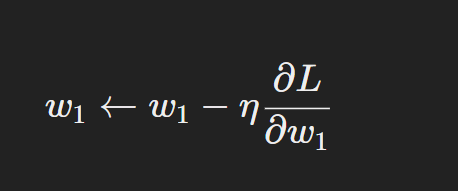

IMPLEMENTATION PART

Epoch 0 loss: 0.255
Epoch 10 loss: 0.193
Epoch 20 loss: 0.149
Epoch 30 loss: 0.116
Epoch 40 loss: 0.092
Epoch 50 loss: 0.075
Epoch 60 loss: 0.062
Epoch 70 loss: 0.053
Epoch 80 loss: 0.046
Epoch 90 loss: 0.040
Epoch 100 loss: 0.035
Epoch 110 loss: 0.031
Epoch 120 loss: 0.028
Epoch 130 loss: 0.026
Epoch 140 loss: 0.024
Epoch 150 loss: 0.022
Epoch 160 loss: 0.020
Epoch 170 loss: 0.019
Epoch 180 loss: 0.017
Epoch 190 loss: 0.016
Epoch 200 loss: 0.015
Epoch 210 loss: 0.014
Epoch 220 loss: 0.014
Epoch 230 loss: 0.013
Epoch 240 loss: 0.012
Epoch 250 loss: 0.012
Epoch 260 loss: 0.011
Epoch 270 loss: 0.011
Epoch 280 loss: 0.010
Epoch 290 loss: 0.010
Epoch 300 loss: 0.009
Epoch 310 loss: 0.009
Epoch 320 loss: 0.009
Epoch 330 loss: 0.008
Epoch 340 loss: 0.008
Epoch 350 loss: 0.008
Epoch 360 loss: 0.008
Epoch 370 loss: 0.007
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.006
Epoch 420 loss: 0.006
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

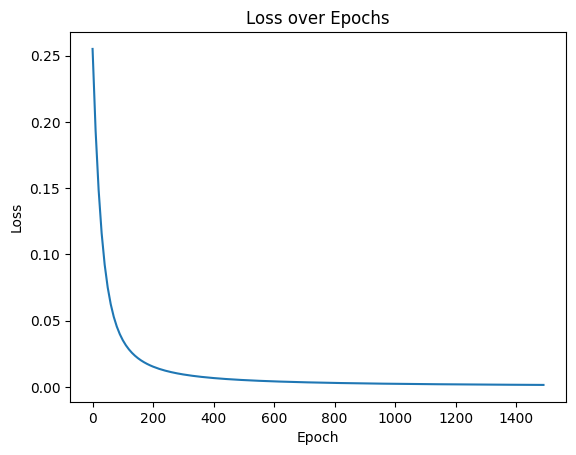

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class NeuralNetwork:
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1500 # number of times to loop through the entire dataset
    losses = []

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))
        losses.append(loss)

    return losses



# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = NeuralNetwork()
losses = network.train(data, all_y_trues)
plt.plot(range(0, 1500, 10), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

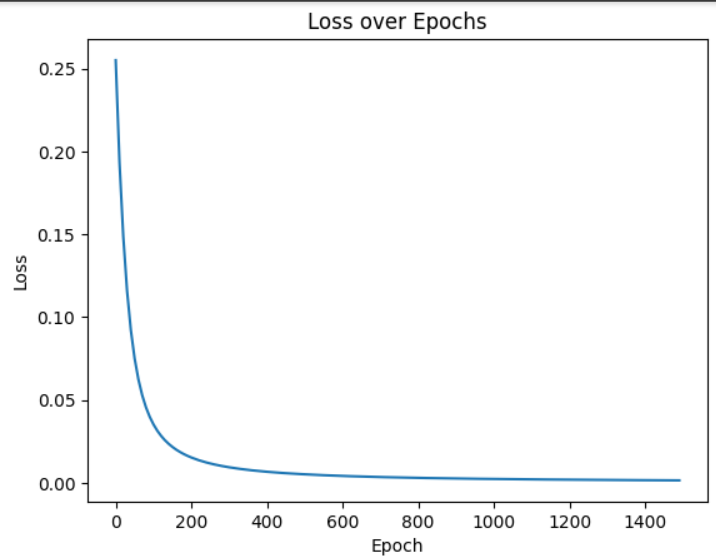

In [16]:
# Test Predictions
Nisha = np.array([-7, -3]) # 128 pounds, 63 inches
Ramesh = np.array([20, 2])  # 155 pounds, 68 inches
print("Nisha: %.3f" % network.feedforward(Nisha))  # 0.972 ---> F (Since its very close to one)
print("Ramesh: %.3f" % network.feedforward(Ramesh)) # 0.045 ---> M (Since its very close to zero)


Nisha: 0.972
Ramesh: 0.045
Zubi: 0.797
